Task 3 :Twitter Sentiment Analysis

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV Files

In [2]:
trained_data = pd.read_csv(r"C:\Users\mohamed mohsin\Downloads\archive (1)\twitter_training.csv")  #reading dataset Csv file train
validated_data = pd.read_csv(r"C:\Users\mohamed mohsin\Downloads\archive (1)\twitter_validation.csv")   #reading dataset Csv file validate

In [3]:
trained_data.columns = ['twt_id' , 'entity' , 'sentiment' , 'twt_content']  #setting names to columns in table trained_data
validated_data.columns = ['twt_id' , 'entity' , 'sentiment' , 'twt_content']  #setting names to columns in table validated_data

Data Description 

In [4]:
trained_data   #displaying trained_data table with column names

,twt_id,entity,sentiment,twt_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
trained_data.describe(include='all')  #full description of data 


,twt_id,entity,sentiment,twt_content
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [7]:
id_counts = trained_data['twt_id'].value_counts()  #count of unique id values
id_counts

twt_id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

Data Visualizations

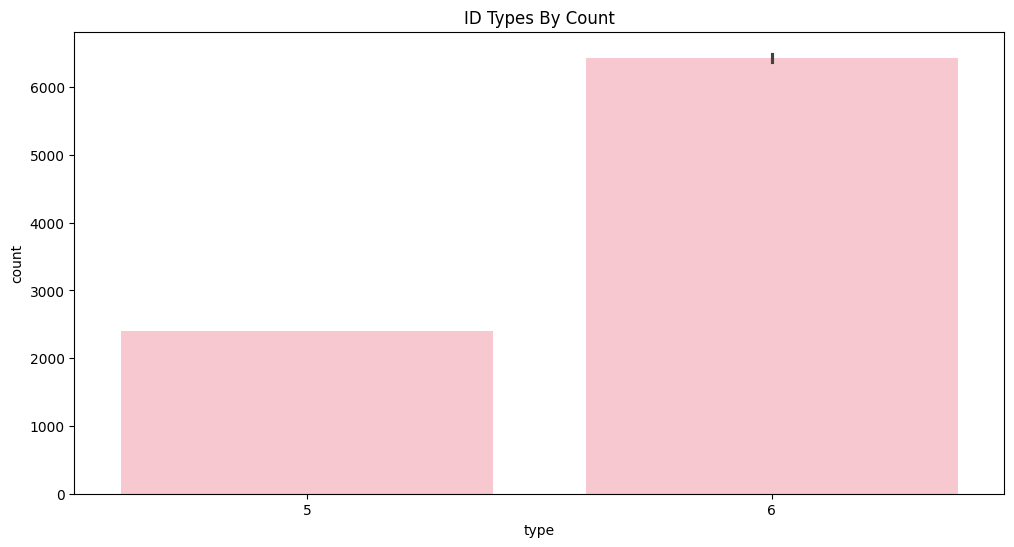

In [104]:
plt.figure(figsize=(12,6))
sns.barplot(y= id_counts.index ,x=id_counts.values , color="pink")
plt.xlabel("type")
plt.ylabel("count")
plt.title("ID Types By Count")
plt.show()  #bar chart that shows the counted values of each unique ID value

In [12]:
twt_unique_elements = trained_data['entity'].value_counts()
twt_unique_elements.head(10)   # count of unique entity values "top 10 rows only"

entity
TomClancysRainbowSix         2400
MaddenNFL                    2400
Microsoft                    2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64

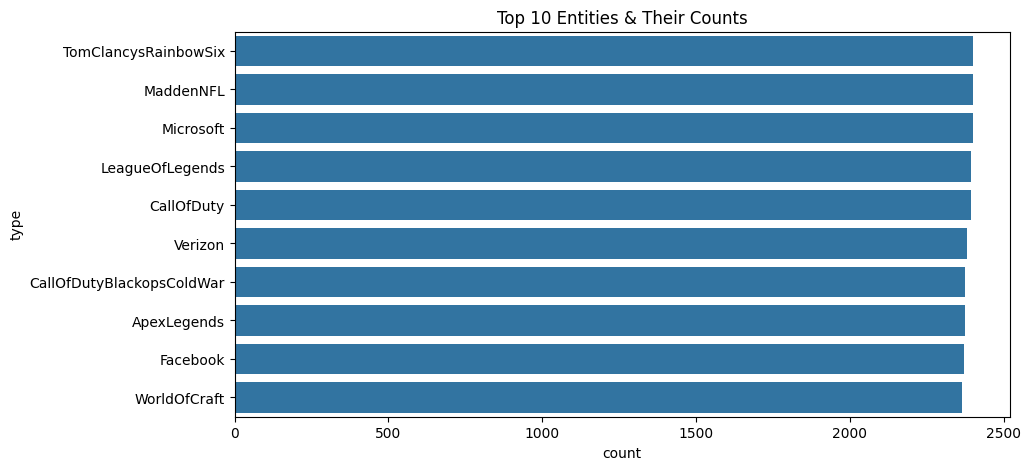

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(x=twt_unique_elements.head(10).values , y=twt_unique_elements.head(10).index)
plt.ylabel("type")
plt.xlabel("count")
plt.title("Top 10 Entities & Their Counts")
plt.show()  # bar chart that shows top 10 entities & their counted values 

In [103]:
trained_data.dropna(subset=['twt_content'],inplace=True)
trained_data.shape   #drops the NAN values in column twt_content and replace it in the original dataframe 

(73995, 4)

In [23]:
sentiment_counts = trained_data["sentiment"].value_counts()
sentiment_counts     #count of unique sentiment values

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

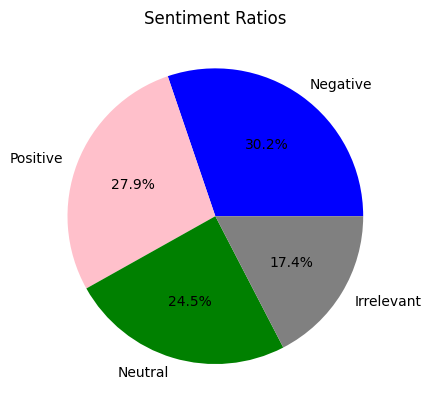

In [107]:
index = [22358 , 20654 , 18108 ,12875]
my_labels = ['Negative' ,'Positive' ,'Neutral' ,'Irrelevant']
my_colors = ['blue' , 'pink' , 'green' ,'grey']
plt.pie(index ,labels = my_labels , colors= my_colors ,autopct='%.1f%%')
plt.title("Sentiment Ratios")
plt.show()   #pie chart that shows the percent of each sentiment type

Data Reformation

In [101]:
### splitting table into 4 new tables grouped by sentiment type , as each sentiment type has a column ###
train0=trained_data[trained_data['sentiment']=="Negative"]
train1=trained_data[trained_data['sentiment']=="Positive"]
train2=trained_data[trained_data['sentiment']=="Irrelevant"]
train3=trained_data[trained_data['sentiment']=="Neutral"]

In [97]:
### dividing the number of rows of each table by 12 and convert their type into integer ###
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [98]:
### concating the 4 sub tables into 1 super table again named "data" ###
data=pd.concat([train0,train1,train2,train3],axis=0) #axis -> rows
data

,twt_id,entity,sentiment,twt_content
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


Data Visualization after Reformation

In [99]:
entity_count = data['entity'].value_counts()
entity_count                                           #count of unique entity values in data table

entity
Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

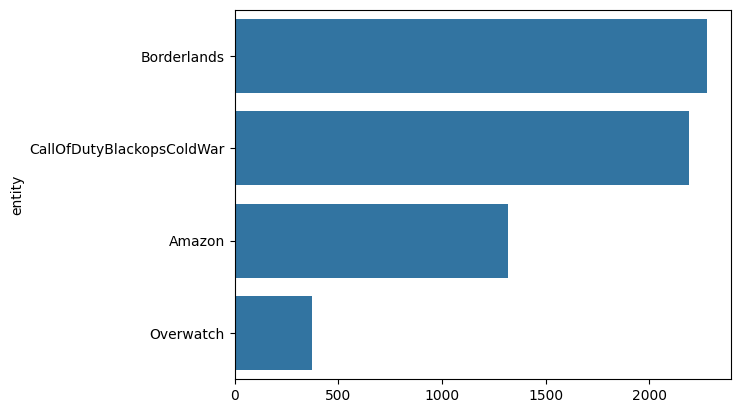

In [100]:
sns.barplot(x=entity_count.values ,y= entity_count.index)
plt.show()                #a bar chart that shows the count of each entity 

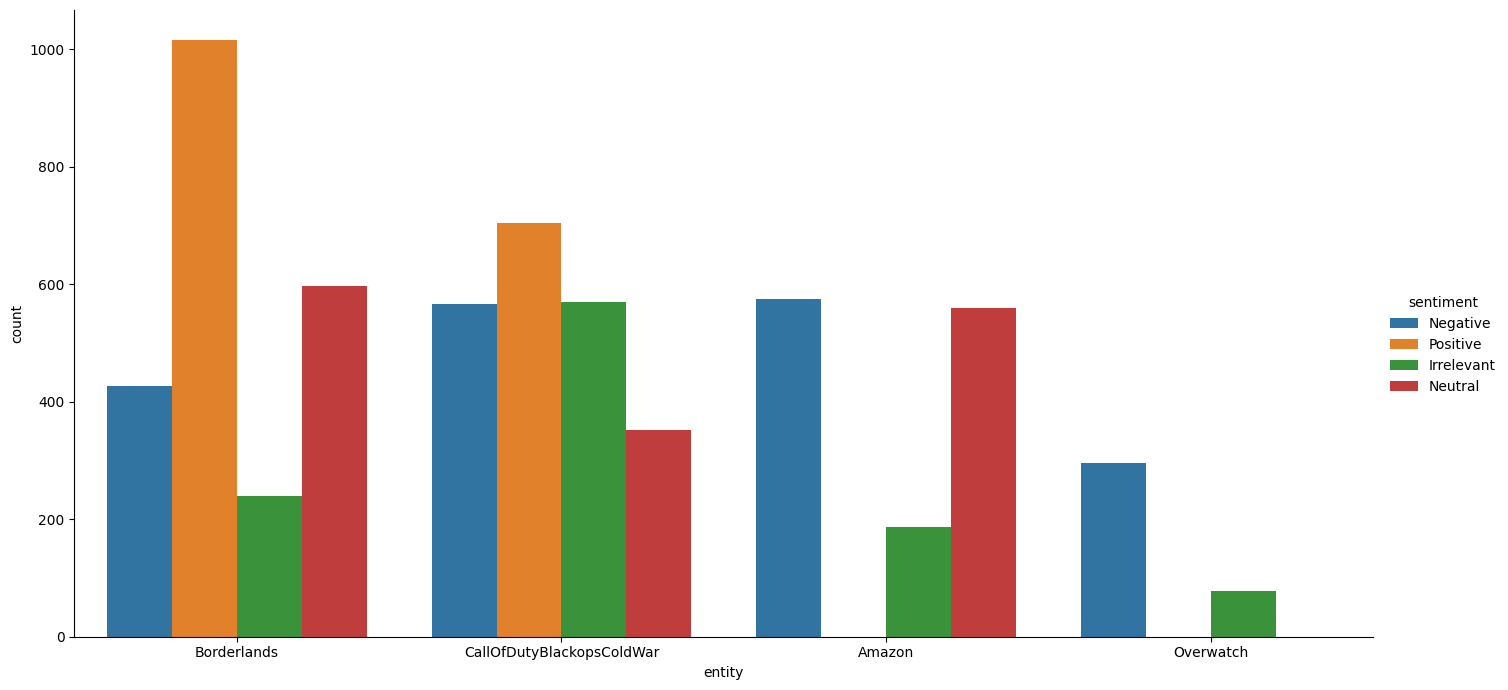

In [120]:
sns.catplot(x='entity',hue='sentiment',kind='count',height=7,aspect=2,data=data)   #sentiment representation of sentiment types by entities

In [110]:
data['twt_content'] = data['twt_content'].astype(str)   #convert tweet content into type string only to be tokenized

Tokenization Process

In [117]:
import nltk   #natural language toolkit library "tokenization"
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import regex as re   #regular expression library
nltk.download('punkt')   #pre-trained NLP model
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\mohamed
[nltk_data]     mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
modified_text = []
for line in data['twt_content']:
   line = line.lower()                 #lowercase the text 
   line = re.sub(r'[^\w\s]', '', line)   # Remove punctuation and replaces it with space
   line = re.sub(r'\d+', '', line)  # Remove digits and replaces it with space
   tokens = word_tokenize(line) #tokenize the text after cleaning it 
   stop_words = set(stopwords.words('english'))   #retreives stop words onto a set
   doc = [word for word in tokens if word not in stop_words]   #removes stop words from tokenized words
   finalText = ' '.join(doc)      #join back the words after tokenization with a whitespace delimiter
   modified_text.append(finalText)    # append the final_text results into the empty set modified_text 
print(modified_text)

['biggest dissappoinment life came year ago fuck borderlands', 'biggest disappointment life came year ago', 'biggest disappointment life came year ago', 'biggest dissappoinment life coming year ago fuck borderlands', 'biggest male dissappoinment life came hanging year time ago fuck borderlands', 'biggest dissappoinment life came back last year ago fuck borderlands last', 'man gearbox really needs fix dissapointing drops new borderlands dlc cant fine farm bosses mayhem get legendary drop anywhere else get drops really sucks alot', 'man gearbox really needs fix disappointing drops new borderlands dlc farm bosses mayhem get legendary drop get drops elsewhere', 'man gearbox really needs fix disssapointing drops new borderlands dlc cant fine farm bosses mayhem get legendary drop elsewhere get drops really sucks alot', 'man bethesda really needs fix dissapointing drops new borderlands cant fine farm bosses mayhem get legendary drop anywhere else get drops really sucks', 'man gearbox really n

In [119]:
data['Text'] = modified_text
data.head()   #replace text column with the modified text after tokenization process & displays top 5 columns

,twt_id,entity,sentiment,twt_content,Text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,biggest dissappoinment life came year ago fuck...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,biggest disappointment life came year ago
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,biggest disappointment life came year ago
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...,biggest dissappoinment life coming year ago fu...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...,biggest male dissappoinment life came hanging ...
